In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Linear Overlapping Dataset
def generate_linear_overlapping(n_samples=1000):
    X, y = make_blobs(n_samples=n_samples, centers=[(-2, -2), (2, 2)], cluster_std = 1.5, random_state=42)
    return X, y

def plot_dataset(X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', s=50)
    plt.title(title)
    plt.show()

def plot_decision_boundary(X, y, clf, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired, s=50)
    plt.title(title)
    plt.show()

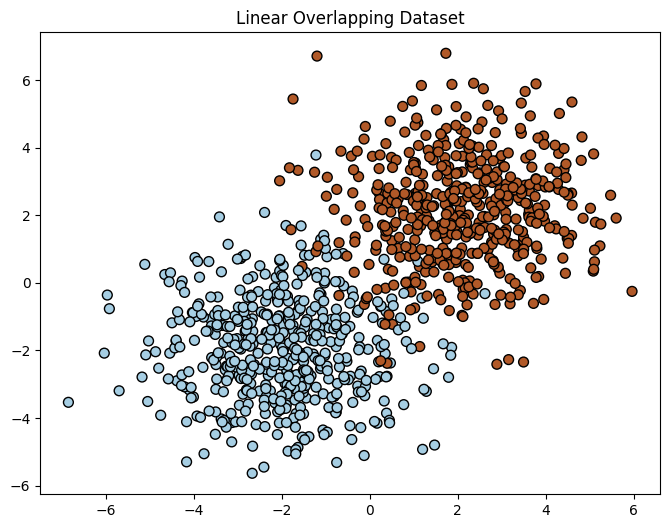

In [ ]:
X, y = generate_linear_overlapping()
plot_dataset(X, y, "Linear Overlapping Dataset")

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]
coef0_values = [0.1, 1, 10]
degree_values = [2, 3, 4]



---


**Linear kernel**

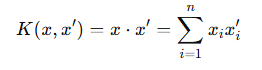

Characteristics:
- The linear kernel is the simplest of all kernels.
- It assumes that the data is linearly separable, meaning a straight line (or hyperplane in higher dimensions) can perfectly separate the different classes in the dataset.
- The decision boundary is a linear hyperplane in the input space.

**Parameters**

- C (Regularization Parameter)
 * Effect: Controls the trade-off between achieving a low error on the training data and maintaining a simple, generalizable model.
 * Higher C: The model becomes less tolerant of misclassification and will focus on minimizing training errors (low bias but potentially high variance). This may lead to overfitting if C is too high.
 * Lower C: The model allows more misclassifications but strives for a simpler decision boundary (higher bias but potentially lower variance). This can help with underfitting if C is too low.

Best Suited For:
- Geometry of Dataset: When the data is linearly separable or nearly linearly separable, i.e., the classes can be divided by a single straight line or hyperplane.
- Performance: The linear kernel is computationally efficient, and performs well when the dataset has fewer features or is already well-separated.

Use Case Example:
- Text classification problems (e.g., spam detection) where each feature is a word frequency or presence, and the classes are linearly separable.





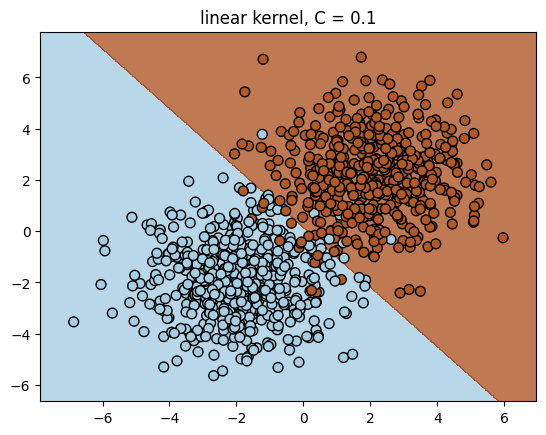

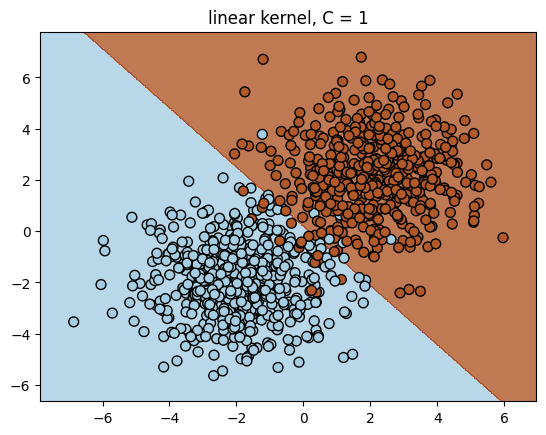

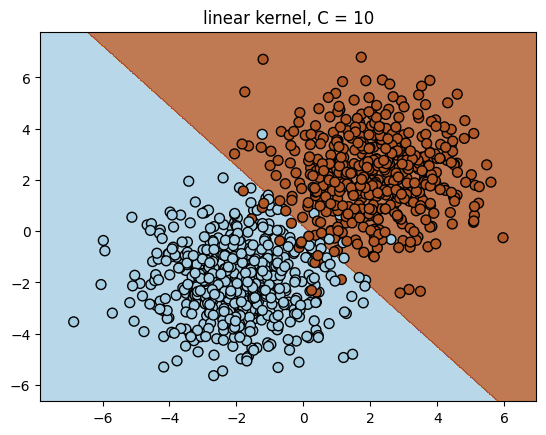

In [ ]:
kernel_type = 'linear'

for C in C_values:
      model = SVC(kernel=kernel_type, C=C)
      model.fit(X, y)
      plot_decision_boundary(X, y, model, f"{kernel_type} kernel, C = {C}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'C': 0.1}
Best cross-validation score: 0.9720


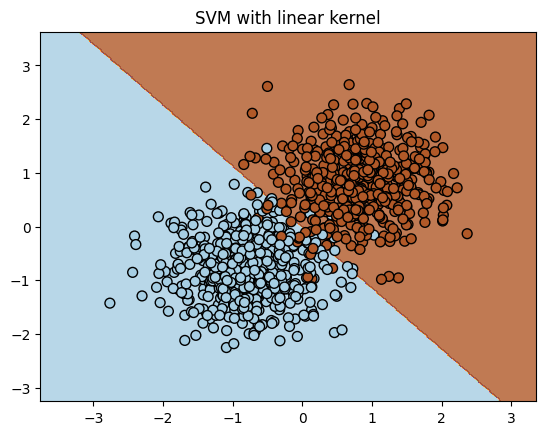

In [ ]:
svc = SVC(kernel=kernel_type)
param_grid = {
    'C': C_values
}
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_scaled, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
plot_decision_boundary(X_scaled, y, best_model, f"SVM with {kernel_type} kernel")



---
**Polynomial Kernel**

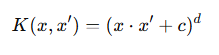

1. Characteristics:
- This kernel can model non-linear relationships by mapping input features to a higher-dimensional space.
- It can create decision boundaries that are more complex than those of the linear kernel (e.g., curves or more intricate surfaces).
- The degree of the polynomial
𝑑
d controls the flexibility of the decision boundary.

2. Best Suited For:
- Geometry of Dataset: When the data is not linearly separable but has a more complex structure that can be separated by higher-degree polynomials.
- Performance: The polynomial kernel can become computationally expensive for large datasets, especially with high-degree polynomials, leading to overfitting if the degree is set too high.

3. Use Case Example:
- Image classification where pixel intensities may not be linearly separable but can be captured by polynomial decision boundaries, especially for datasets with geometric relationships.

In [ ]:
kernel_type = 'poly'
for C in C_values:
      for coef0 in coef0_values:
        for degree in degree_values:
            model = SVC(kernel=kernel_type, C=C, coef0=coef0, degree=degree)
            model.fit(X, y)
            plot_decision_boundary(X, y, model, f"{kernel_type} kernel, C = {C}, coef0 = {coef0}, degree ={degree}")
plt.show()

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'C': 1, 'coef0': 0.1, 'degree': 3}
Best cross-validation score: 0.9720


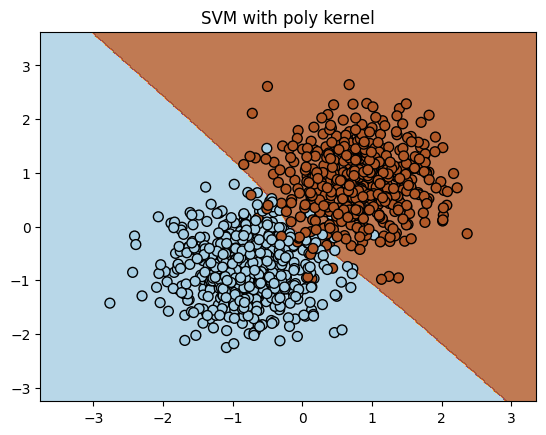

In [ ]:
svc = SVC(kernel=kernel_type)
param_grid = {
    'C' : C_values,
    'degree' : degree_values,
    'coef0' : coef0_values
}
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_scaled, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
plot_decision_boundary(X_scaled, y, best_model, f"SVM with {kernel_type} kernel")



---
**Sigmoid Kernel**

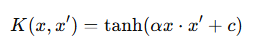

Characteristics:
- The sigmoid kernel is inspired by the activation function used in neural networks.
- It can map the input data to a feature space that can capture complex relationships, but it can also lead to difficulties in tuning, as it has no clear interpretability for general data.
- The decision boundary tends to resemble that of a neural network (non-linear but with some constraints).

Parameters
1. C (Regularization Parameter)
Effect: Similar to the Linear kernel, the C parameter controls the trade-off between achieving a low error on the training data and maintaining a simple, generalizable model.

  Higher C: A higher value of C reduces the penalty for misclassification, leading to a model that tries to fit the training data as well as possible. This can lead to overfitting.

  Lower C: A lower C increases the tolerance for misclassification, leading to a simpler decision boundary that may not perfectly fit the training data but might generalize better to unseen data.
2. Gamma (γ)
Effect: Gamma controls the influence of each individual training point in the kernel function. It is the scale parameter that affects the width of the Gaussian-like function in the Sigmoid kernel.

  Higher Gamma: A larger gamma value makes the kernel function more sensitive to individual data points. This can result in a more complex decision boundary, which can lead to overfitting (high variance).

  Lower Gamma: A smaller gamma value results in a smoother decision boundary, which can help reduce overfitting by making the model less sensitive to noise. However, it may lead to underfitting if the value is too low.
3. Offset (r)
Effect: The offset parameter
𝑟
r shifts the sigmoid function. It is akin to the bias term in a neural network.

  Higher r: If
𝑟
r is high, the Sigmoid function becomes less sensitive to the input values, resulting in a decision boundary that is more global and potentially smoother. However, it might lead to underfitting in some cases.

  Lower r: If
𝑟
r is low, the Sigmoid function becomes more sensitive to the inputs, making the model fit the data more closely. However, this can lead to overfitting if combined with a high value of
𝛾
γ.

Best Suited For:
- Geometry of Dataset: Suitable when data resembles the output of a neural network, or when trying to approximate a neural network model.
- Performance: It is rarely used in practice because it often leads to performance issues like instability in training, and it is less flexible compared to RBF or polynomial kernels.

Use Case Example:
Historically used in some applications of neural network-like behavior modeling or when trying to model interactions resembling neural activation.

In [ ]:
kernel_type = 'sigmoid'
for C in C_values:
    for gamma in gamma_values:
      for coef0 in coef0_values:
            model = SVC(kernel=kernel_type, C=C, gamma=gamma, coef0=coef0)
            model.fit(X, y)
            plot_decision_boundary(X, y, model, f"{kernel_type} kernel, C = {C}, coef0={coef0}, gamma ={gamma}")
plt.show()

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'C': 0.1, 'coef0': 0.1, 'gamma': 0.1}
Best cross-validation score: 0.9720


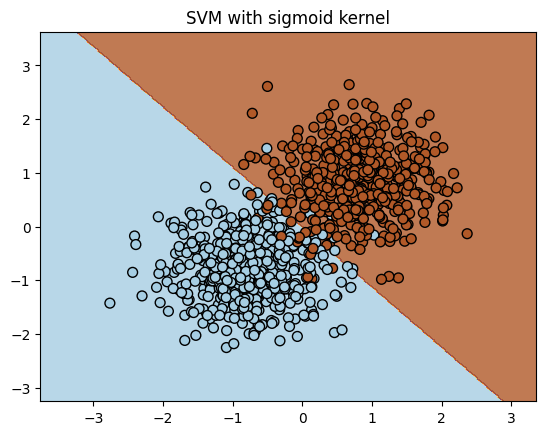

In [ ]:
kernel_type = 'sigmoid'
svc = SVC(kernel=kernel_type)
param_grid = {
    'C': C_values,
    'gamma': gamma_values,
    'coef0' : coef0_values
}
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_scaled, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
plot_decision_boundary(X_scaled, y, best_model, f"SVM with {kernel_type} kernel")



---
**Radial Basis Function (RBF) Kernel / Gaussian Kernel**

- The RBF kernel computes the similarity between two points in the feature space using the following equation:

$$K(x, y) = e^{\frac{-\|x - y\|^2}{2\sigma^2}}$$


Where:

* x and x′ are two data points in the feature space.
* $$∥x−y∥^2$$ is the squared Euclidean distance between the two points.
* σ (sigmoid) is the only parameter of this function and it corresponds to the standard deviation.

$$K(x, y) = e^{{-\gamma.||x - y\|^2}}$$

**Parameters**
* kernel='rbf': Specifies that the RBF kernel should be used.
* gamma: The kernel coefficient, controlling the influence of each training sample.
* C: The regularization parameter, controlling the trade-off between achieving a low training error and minimizing model complexity.

Characteristics:
- RBF kernel maps the input features to an infinite-dimensional space, which allows it to handle highly non-linear decision boundaries.
- It creates circular decision boundaries, meaning that it can effectively separate data that is clustered in different regions of the space.
- The kernel's behavior is controlled by the parameter
𝜎
σ (or
𝛾
γ): smaller values of
𝜎
σ lead to a more flexible model, while larger values make the model more rigid.

Best Suited For:
- Geometry of Dataset: When the data is highly non-linearly separable, and the decision boundaries need to be complex to accommodate intricate patterns in the data.
- Performance: RBF is widely used and performs well on a variety of datasets. However, it can be computationally expensive, particularly with large datasets or high-dimensional feature spaces.

Use Case Example:
- Complex classification tasks like face recognition or handwritten digit recognition, where classes form clusters in different regions of the feature space.



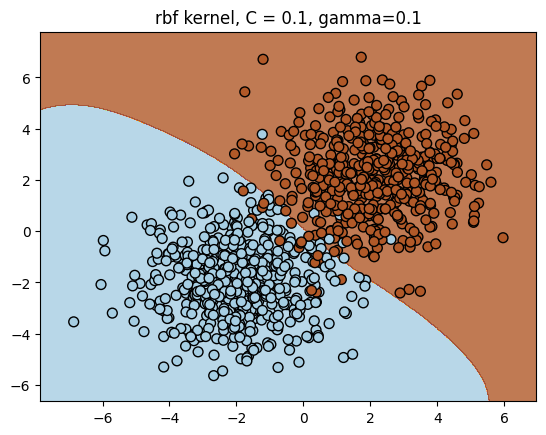

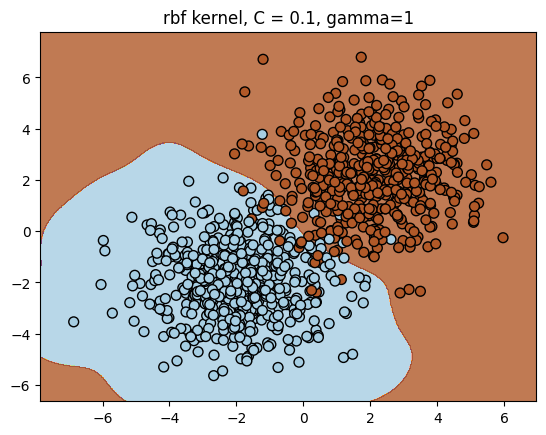

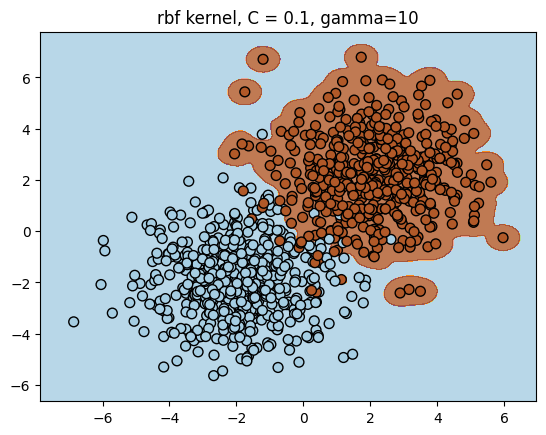

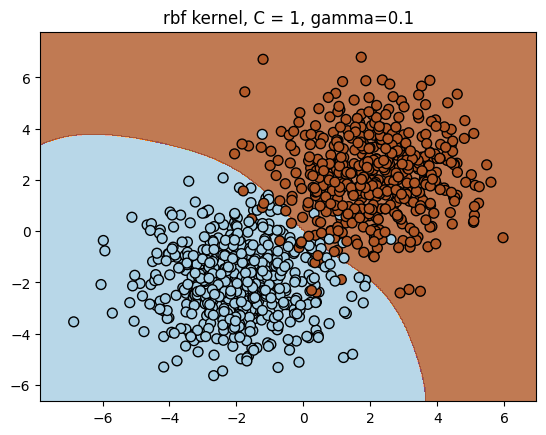

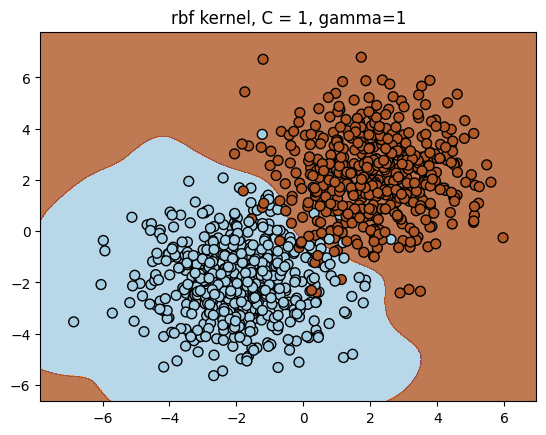

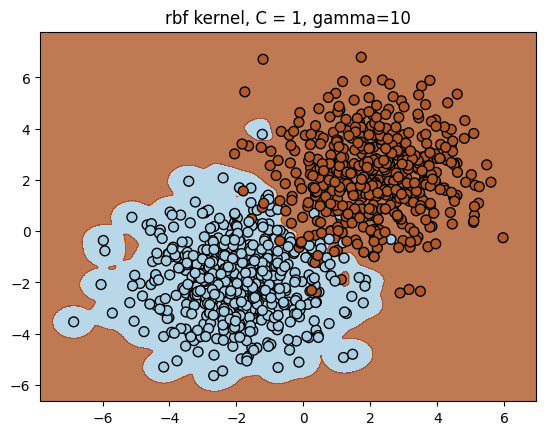

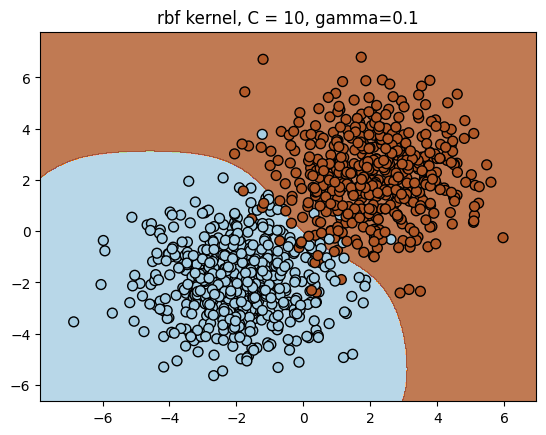

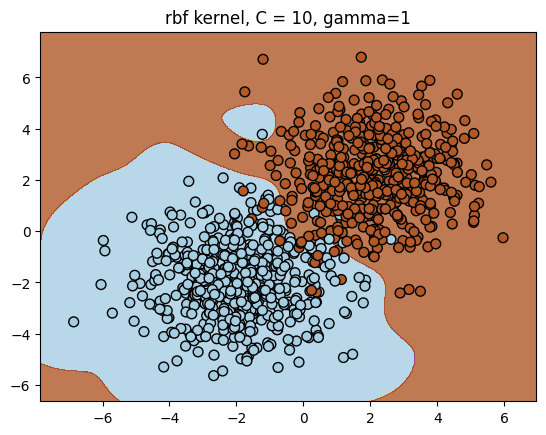

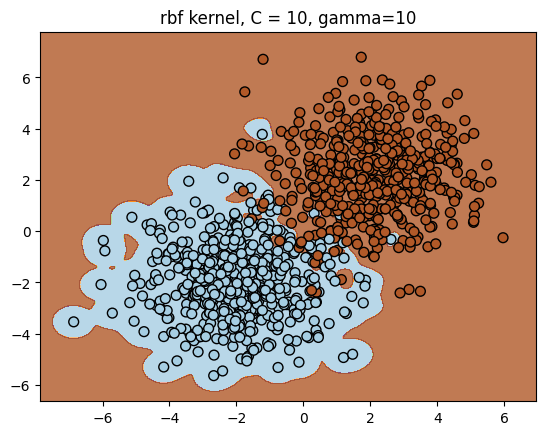

In [ ]:
kernel_type = 'rbf'
for C in C_values:
    for gamma in gamma_values:
        model = SVC(kernel=kernel_type, C=C, gamma=gamma, coef0=coef0)
        model.fit(X, y)
        plot_decision_boundary(X, y, model, f"{kernel_type} kernel, C = {C}, gamma={gamma}")
plt.show()

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'C': 1, 'gamma': 0.1}
Best cross-validation score: 0.9710


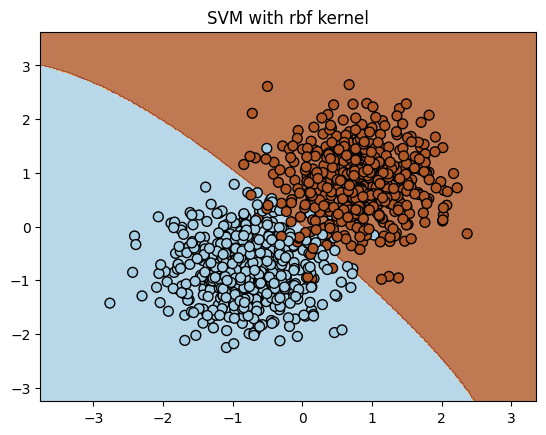

In [ ]:
kernel_type = 'rbf'
svc = SVC(kernel=kernel_type)
param_grid = {
    'C': C_values,
    'gamma': gamma_values
}
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_scaled, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
plot_decision_boundary(X_scaled, y, best_model, f"SVM with {kernel_type} kernel")